# Model 3-mers 

Code to investigate the kmers in the Swiss-Prot, Bacillus and Bacteroides trained Protvec models. Determine what properties determine how Protvec works. 

Protvec mondel trained with Swissprot sequences accessed from 

In [63]:
#imports 
import pandas as pd
import numpy as np 
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans
from collections import Counter

## PCA of each of the 3-mer vectors in each of the models 

In [5]:
#import the kmers from the models 
#kmers from the orginal Protvec model trained with Swissprot 
swissprot_vec = pd.read_csv('protVec_100d_3grams.csv', sep='\t', index_col = 0)
swissprot_kmers = swissprot_vec.index.values

#get kmers from the Protvec model trained with sequences involved in Bacteriodes carbohydrate metabolism 
bacter_vec = pickle.load(open('bacteroides_3mervectors.pkl', 'rb'))
bacter_kmers = list(list(bacter_vec.keys()))
bacter_vec = np.stack([bacter_vec.get(kmer) for kmer in bacter_kmers], axis = 0)

#get kmers from the Protvec model trained with sequences involved in Bacillus carbohydrate metabolism 
bacil_vec = pickle.load(open('bacillus_3mervectors.pkl', 'rb'))
bacil_kmers = list(list(bacil_vec.keys()))
bacil_vec = np.stack([bacil_vec.get(kmer) for kmer in bacil_kmers], axis = 0)

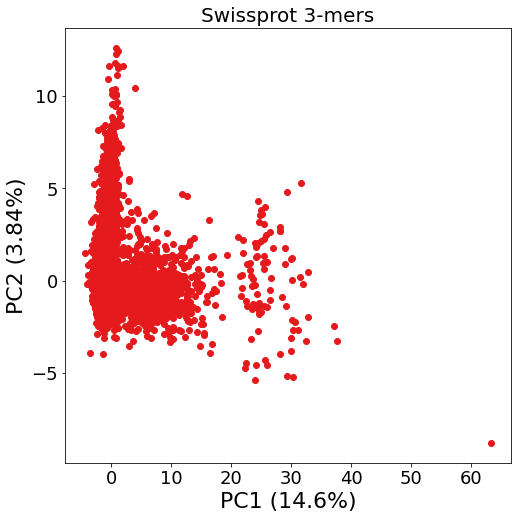

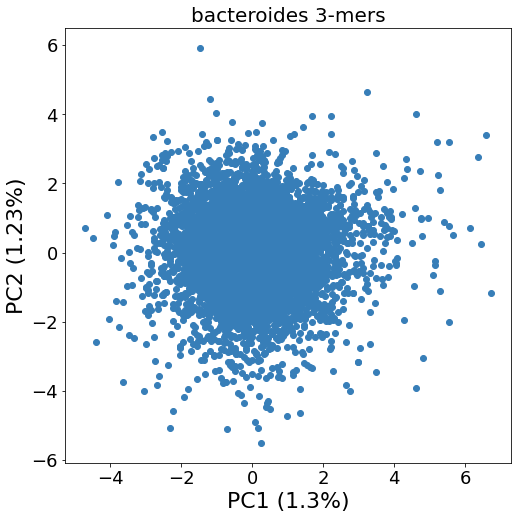

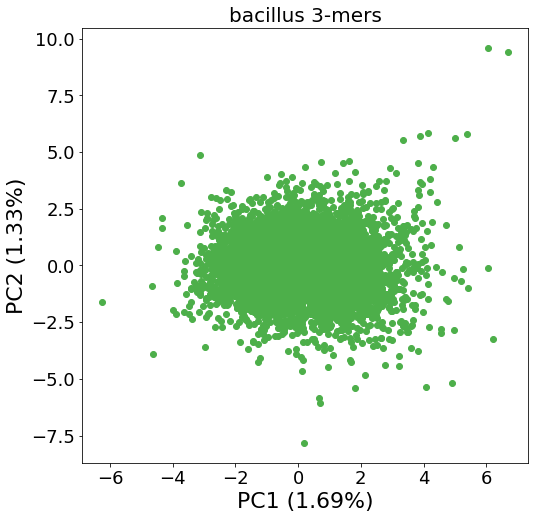

In [8]:
## do the swissprot PCA 
swissprot_scaled = StandardScaler().fit_transform(swissprot_vec) 
swissprot_scaled = pd.DataFrame(swissprot_scaled, columns = swissprot_vec.columns.values).set_index(swissprot_vec.index.values)

pca_swiss = PCA(n_components = 2)
swissprot_pca = pca_swiss.fit_transform(swissprot_scaled)

swissprot_pcaDf = pd.DataFrame(data = swissprot_pca, columns = ['PC1', 'PC2'])
swissprot_pcaDf = pd.concat([swissprot_pcaDf, pd.DataFrame(swissprot_vec.index.values, columns = ['3-mers'])], axis = 1)

#get the expalined variance for the PCA 
swissprot_var = pca_swiss.explained_variance_ratio_
x_label = 'PC1 ('+str(np.round(swissprot_var[0]*100,2))+"%)"
y_label = 'PC2 ('+str(np.round(swissprot_var[1]*100,2))+"%)"

#visualsise the swissprot PCA  
fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.set_xlabel(x_label, fontsize = 22)
ax1.set_ylabel(y_label, fontsize = 22)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_title('Swissprot 3-mers', fontsize = 20) 
ax1.scatter(swissprot_pcaDf['PC1'], swissprot_pcaDf['PC2'], color = '#e41a1c')

## do the bacteroides PCA 
bacter_scaled = StandardScaler().fit_transform(bacter_vec) 
bacter_scaled = pd.DataFrame(bacter_scaled, columns = swissprot_vec.columns.values)
bacter_scaled.index = bacter_kmers

pca_bacter = PCA(n_components = 2)
bacter_pca = pca_bacter.fit_transform(bacter_scaled)

bacter_pcaDf = pd.DataFrame(data = bacter_pca, columns = ['PC1', 'PC2'])
bacter_pcaDf = pd.concat([bacter_pcaDf, pd.DataFrame(bacter_kmers, columns = ['3-mers'])], axis = 1)

#get the expalined variance for the PCA 
bacter_var = pca_bacter.explained_variance_ratio_
x_label = 'PC1 ('+str(np.round(bacter_var[0]*100,2))+"%)"
y_label = 'PC2 ('+str(np.round(bacter_var[1]*100,2))+"%)"

##visualsise the bacteroides PCA  
fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_xlabel(x_label, fontsize = 22)
ax2.set_ylabel(y_label, fontsize = 22)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_title('bacteroides 3-mers', fontsize = 20) 
ax2.scatter(bacter_pcaDf['PC1'], bacter_pcaDf['PC2'],  color ='#377eb8')

## do the bacillus PCA 
bacil_scaled = StandardScaler().fit_transform(bacil_vec) 
bacil_scaled = pd.DataFrame(bacil_scaled, columns = swissprot_vec.columns.values)
bacil_scaled.index = bacil_kmers

pca_bacil = PCA(n_components = 2)
bacil_pca = pca_bacil.fit_transform(bacil_scaled)

bacil_pcaDf = pd.DataFrame(data = bacil_pca, columns = ['PC1', 'PC2'])
bacil_pcaDf = pd.concat([bacil_pcaDf, pd.DataFrame(bacil_kmers, columns = ['3-mers'])], axis = 1)

#get the expalined variance for the PCA 
bacil_var = pca_bacil.explained_variance_ratio_
x_label = 'PC1 ('+str(np.round(bacil_var[0]*100,2))+"%)"
y_label = 'PC2 ('+str(np.round(bacil_var[1]*100,2))+"%)"

#visualsise the bacil PCA  
fig3 = plt.figure(figsize = (8,8))
ax3 = fig3.add_subplot(1,1,1)
ax3.set_xlabel(x_label, fontsize = 22)
ax3.set_ylabel(y_label, fontsize = 22)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.set_title('bacillus 3-mers', fontsize = 20) 
ax3.scatter(bacil_pcaDf['PC1'], bacil_pcaDf['PC2'], color ='#4daf4a')

## Interpret clustering of 3-mer vectors in the swissprot model

Can see that there are three groups of 3-mers - why? 

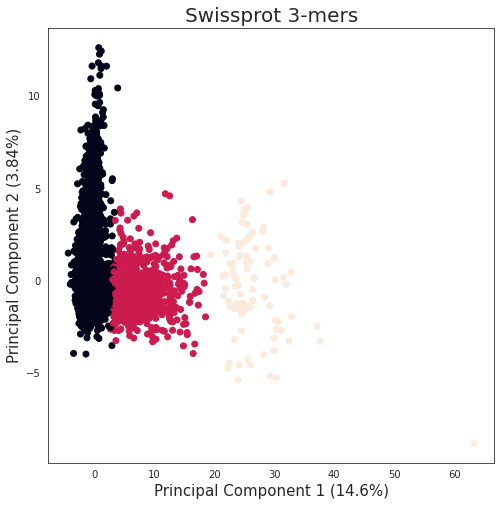

In [55]:
##Look at the number of clusters we should use for the kmeans 
swissprot_scaled = StandardScaler().fit_transform(swissprot_vec) 
swissprot_scaled = pd.DataFrame(swissprot_scaled, columns = swissprot_vec.columns.values).set_index(swissprot_vec.index.values)

pca_s = PCA(n_components = 2)
swissprot_pca = pca_s.fit_transform(swissprot_scaled)

swissprot_pcaDf = pd.DataFrame(data = swissprot_pca, columns = ['principal component 1', 'principal component 2'])
swissprot_pcaDf = pd.concat([swissprot_pcaDf, pd.DataFrame(swissprot_vec.index.values, columns = ['3-mers'])], axis = 1)

#get the expalined variance for the PCA 
swissprot_var = pca_s.explained_variance_ratio_
x_label = 'Principal Component 1 ('+str(np.round(swissprot_var[0]*100,2))+"%)"
y_label = 'Principal Component 2 ('+str(np.round(swissprot_var[1]*100,2))+"%)"


#do Kmeans and colour the PCA accordingly
swiss_kmeans = KMeans(n_clusters=3,init='random', random_state = 42)

#fit on the scaled data
swiss_kmeans.fit(swissprot_scaled)
swiss_k_pred = swiss_kmeans.predict(swissprot_scaled)

#visualsise the swissprot PCA  
fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.set_xlabel(x_label, fontsize = 15)
ax1.set_ylabel(y_label, fontsize = 15)
ax1.set_title('Swissprot 3-mers', fontsize = 20) 
ax1.scatter(swissprot_pcaDf['principal component 1'], swissprot_pcaDf['principal component 2'], c = swiss_k_pred)

In [64]:
def kmeans_info(vecs, n_clusters): 
    """Does kmeans on vectors and returns the distance of these clusters from the centre"""
    
    #standardise before doing kmeans 
    vecs_scaled = StandardScaler().fit_transform(vecs)
    
    kmeans = KMeans(init = 'random', n_clusters = n_clusters, random_state = 40)
    kmeans.fit(vecs_scaled)
    kmeans_pred = kmeans.predict(vecs_scaled)
    kmeans_counter = (Counter(kmeans_pred))
    kmeans_clusterIDs = list(kmeans_counter.keys())
    kmeans_clusterIDs = sorted(kmeans_clusterIDs)
    
    #get cluster centres 
    kmeans_clustercentres = kmeans.cluster_centers_ 
    
    #make zero vector to measure the distance of the cluster centres from the origin 
    zero = np.zeros(100)
    
    #get the disstances of the cluster centres from the origin 
    kmeans_clusterdist = [distance.euclidean(zero, centre) for centre in kmeans_clustercentres]
    
    #make into a dataframe 
    kmeans_clusters= pd.DataFrame({'Cluster_ID':kmeans_clusterIDs, 'Number_of_kmers':[kmeans_counter.get(cluster) for cluster in kmeans_clusterIDs], "Centre":[kmeans_clustercentres[i] for i in range(len(kmeans_clustercentres))], "Distance_from_zero": kmeans_clusterdist}).set_index('Cluster_ID')

    return kmeans_clusters, kmeans_pred 

def dict_kmers(alphabet, kmers): 
    """Make a dictionary of the amino acids and which kmers they occur in"""
    
    #make a list of the amino acid occurances 
    alpha_occurances = []

    #iterate through the amino acids 
    for a in alphabet: 
    
        alpha_list = []
    
        for kmer in kmers: 
            if a in kmer: 
                alpha_list.append(kmer)
                
        alpha_occurances.append(alpha_list)
        
    #make into a dictionary 
    kmer_aa_dict = dict(zip(alphabet, alpha_occurances))
    
    return kmer_aa_dict

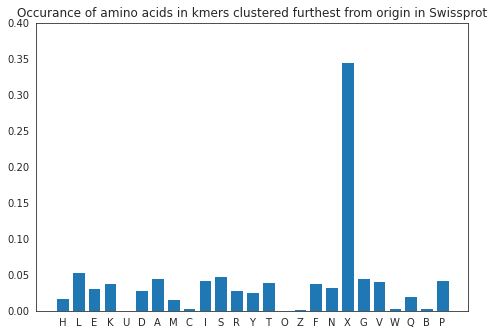

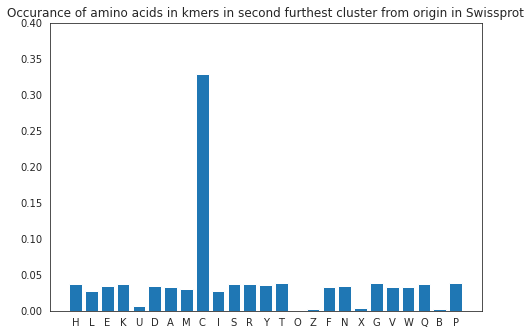

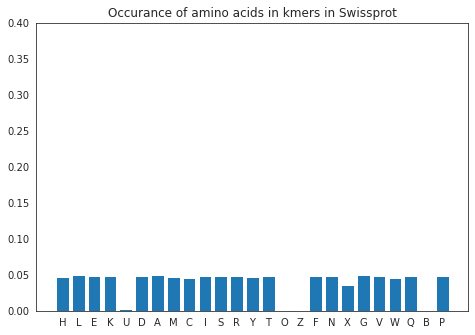

In [70]:
#sort the cluster distances 
swissprot_clusters, swissprot_pred = kmeans_info(swissprot_vec, 3)
swissprot_sorted_clusterdist = np.sort(swissprot_clusters['Distance_from_zero'])[::-1]

#consider the cluster futherest from centre 
swissprot_1dist = swissprot_sorted_clusterdist[0]
swissprot_1dist_ID = int(swissprot_clusters[swissprot_clusters['Distance_from_zero'] == swissprot_1dist].index.values)
#get the kmers in this cluster 
swissprot_1dist_kmers = [swissprot_vec.index.values[i] for i in range(0,len(swissprot_pred)) if swissprot_pred[i]==swissprot_1dist_ID]

#consider the cluster second futherest from centre 
swissprot_2dist = swissprot_sorted_clusterdist[1]
swissprot_2dist_ID = swissprot_clusters[swissprot_clusters['Distance_from_zero'] == swissprot_2dist].index.values
#get the kmers in this cluster 
swissprot_2dist_kmers = [swissprot_vec.index.values[i] for i in range(0,len(swissprot_pred)) if swissprot_pred[i]==swissprot_2dist_ID]

#set some parameters for the bar charts 
ymax = 0.4

#get the occurances of each amino acid in the cluster furthest from the centre 
alphabet = [a for a in list(set(list(''.join(swissprot_kmers)))) if a.isupper()]
swissprot_1dist_aa = dict_kmers(alphabet,swissprot_1dist_kmers)
swissprot_1dist_occurances = [len(swissprot_1dist_aa.get(aa)) for aa in alphabet]
#normalise by the number of kmers in the cluster 
swissprot_1dist_occurances = swissprot_1dist_occurances/np.sum(swissprot_1dist_occurances)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(alphabet,swissprot_1dist_occurances)
ax.set_ylim([0,ymax])
ax.set_title('Occurance of amino acids in kmers clustered furthest from origin in Swissprot')
plt.show()

#get the occcurances of each amino acid in the cluster second furthest from the centre
swissprot_2dist_aa = dict_kmers(alphabet, swissprot_2dist_kmers)
swissprot_2dist_occurances = [len(swissprot_2dist_aa.get(aa)) for aa in alphabet]
swissprot_2dist_occurances = swissprot_2dist_occurances/np.sum(swissprot_2dist_occurances)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(alphabet,swissprot_2dist_occurances)
ax.set_title('Occurance of amino acids in kmers in second furthest cluster from origin in Swissprot')
ax.set_ylim([0,ymax])
plt.show()

#get the occurances of each amino acid in all kmers (as a baseline)
swissprot_all_aa = dict_kmers(alphabet, swissprot_kmers)
swissprot_all_occurances = [len(swissprot_all_aa.get(aa)) for aa in alphabet]
swissprot_all_occurances = swissprot_all_occurances/np.sum(swissprot_all_occurances)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(alphabet,swissprot_all_occurances)
ax.set_title('Occurance of amino acids in kmers in Swissprot')
ax.set_ylim([0,ymax])
plt.show()

Cluster on the outer contains 3-mers containing 'X' and the cluster closest contains 3-mers with 'C' 

## Exclude 3-mers containing X

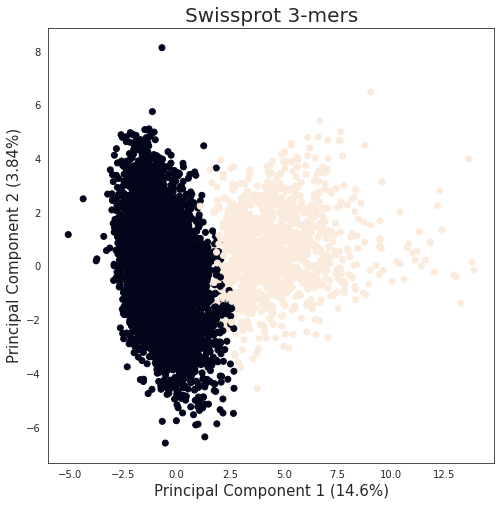

In [57]:
#remove kmers containing 'X'
swissprot_kmers_noX = [kmer for kmer in swissprot_kmers if 'X' not in kmer]
swissprot_vec_noX = swissprot_vec.loc[swissprot_kmers_noX]

##Look at the number of clusters we should use for the kmeans 
swissprot_scaled_noX = StandardScaler().fit_transform(swissprot_vec_noX) 
swissprot_scaled_noX = pd.DataFrame(swissprot_scaled_noX, columns = swissprot_vec_noX.columns.values).set_index(swissprot_vec_noX.index.values)

pca_s_noX = PCA(n_components = 2)
swissprot_pca_noX = pca_s_noX.fit_transform(swissprot_scaled_noX)

swissprot_pcaDf_noX = pd.DataFrame(data = swissprot_pca_noX, columns = ['principal component 1', 'principal component 2'])
swissprot_pcaDf_noX = pd.concat([swissprot_pcaDf_noX, pd.DataFrame(swissprot_vec_noX.index.values, columns = ['3-mers'])], axis = 1)

#get the expalined variance for the PCA 
swissprot_var_noX = pca_s_noX.explained_variance_ratio_
x_label = 'Principal Component 1 ('+str(np.round(swissprot_var[0]*100,2))+"%)"
y_label = 'Principal Component 2 ('+str(np.round(swissprot_var[1]*100,2))+"%)"


#do Kmeans and colour the PCA accordingly
swiss_kmeans_noX = KMeans(n_clusters=2,init='random', random_state = 42)

#fit on the scaled data
swiss_kmeans_noX.fit(swissprot_scaled_noX)
swiss_k_pred_noX = swiss_kmeans_noX.predict(swissprot_scaled_noX)

#visualsise the swissprot PCA  
fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.set_xlabel(x_label, fontsize = 15)
ax1.set_ylabel(y_label, fontsize = 15)
ax1.set_title('Swissprot 3-mers', fontsize = 20) 
ax1.scatter(swissprot_pcaDf_noX['principal component 1'], swissprot_pcaDf_noX['principal component 2'], c = swiss_k_pred_noX)

### Get the amino of the 100 most informative 3-mers for each of the model 
Get the 3-mers with the greatest euclidean distance from the centre and get the occurance of each amino acid

In [20]:
#get the distances of the 3-mers to the origin 
origin = np.zeros(100) 

#get the distances of the bacillus 3-mers to the origin 
bacil_dist = [distance.euclidean(origin, vec) for vec in bacil_scaled.values]
bacil_distDf = pd.DataFrame({'md5': bacil_kmers, 'dist': bacil_dist}).sort_values('dist', ascending = False)

#get the distances of the bacteroides 3-mers to the origin 
bacter_dist = [distance.euclidean(origin, vec) for vec in bacter_scaled.values]
bacter_distDf = pd.DataFrame({'md5': bacter_kmers, 'dist': bacter_dist}).sort_values('dist', ascending = False)

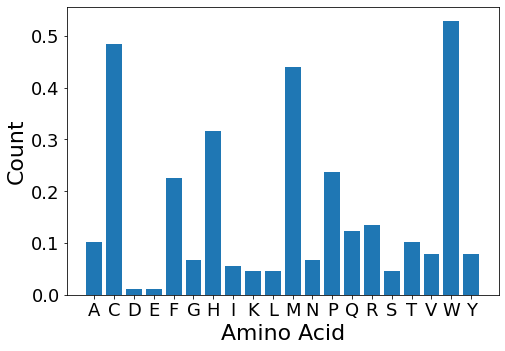

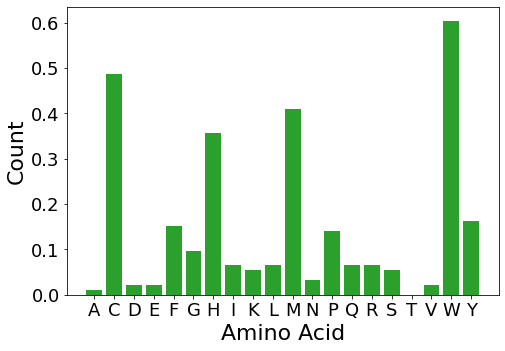

In [45]:
def dict_kmers(alphabet, kmers): 
    """Make a dictionary of the amino acids and which kmers they occur in"""
    
    #make a list of the amino acid occurances 
    alpha_occurances = []

    #iterate through the amino acids 
    for a in alphabet: 
    
        alpha_list = []
    
        for kmer in kmers: 
            if a in kmer: 
                alpha_list.append(kmer)
                
        alpha_occurances.append(alpha_list)
        
    #make into a dictionary 
    kmer_aa_dict = dict(zip(alphabet, alpha_occurances))
    
    return kmer_aa_dict

#get the occurances of each amino acid in the cluster furthest from the centre 
alphabet = [a for a in list(set(list(''.join(swissprot_kmers)))) if a.isupper()]
#drop the letters which do not occur in the data 
alphabet.remove('U')
alphabet.remove('X')
alphabet.remove('Z')
alphabet.remove('B')
alphabet.remove('O')
alphabet = sorted(alphabet)

bacil_1dist_aa = dict_kmers(alphabet,bacil_distDf[0:100]['md5'])
bacil_1dist_occurances = [len(bacil_1dist_aa.get(aa)) for aa in alphabet]
bacil_1dist_occurances = preprocessing.normalize([bacil_1dist_occurances]).tolist()[0]
ymax = 59
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(alphabet,bacil_1dist_occurances)
#ax.set_ylim([0,ymax])
ax.set_xlabel('Amino Acid', fontsize = 22)
ax.set_ylabel('Count', fontsize = 22)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

bacter_1dist_aa = dict_kmers(alphabet,bacter_distDf[0:100]['md5'])
bacter_1dist_occurances = [len(bacter_1dist_aa.get(aa)) for aa in alphabet]
bacter_1dist_occurances = preprocessing.normalize([bacter_1dist_occurances]).tolist()[0]
#ymax = 0.25
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(alphabet,bacter_1dist_occurances, color ='tab:green')
#ax.set_ylim([0,ymax])
ax.set_xlabel('Amino Acid', fontsize = 22)
ax.set_ylabel('Count', fontsize = 22)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

### Singuar value decomposition 

Plot the singular values from each of the models

In [49]:
def standardiseVecs(arr): 
    """Standardise the columns in the array to have 0 mean and unit variance"""
    
    #get the number of dimensions
    d = len(arr)
    
    #get the number of columns 
    cols = arr.shape[1]
    
    #get the kmers 
    kmers = list(arr.columns.values)
    
    #intialise an empty array 
    stand_arr = np.zeros((d,cols))

    #standardise 
    for i in range(0,cols): 
        x = arr[kmers[i]]
        z = (x-np.mean(x))/np.std(x)
        #add the standardised column to the new array 
        stand_arr[:,i] = z
        
    return stand_arr

#do SVD of each model 

#transpose the models 
swissprot_vec_T = swissprot_vec.T
bacter_vec_T = pd.DataFrame(bacter_vec.T, columns = bacter_kmers)
bacil_vec_T = pd.DataFrame(bacil_vec.T, columns = bacil_kmers)

#standarise the models 
swissprot_vec_T_scale = standardiseVecs(swissprot_vec_T) 
bacter_vec_T_scale = standardiseVecs(bacter_vec_T)
bacil_vec_T_scale = standardiseVecs(bacil_vec_T)

#do the SVD 
U_swissprot, S_swissprot, V_t_swissprot = randomized_svd(swissprot_vec_T_scale, 100)
U_bacter, S_bacter, V_t_bacter = randomized_svd(bacter_vec_T_scale, 100)
U_bacil, S_bacil, V_t_bacil = randomized_svd(bacil_vec_T_scale, 100)

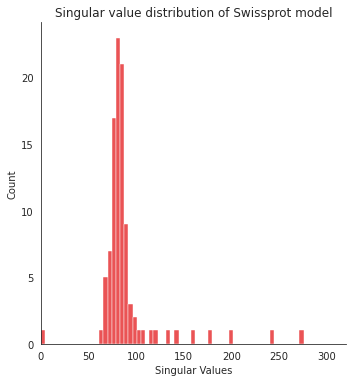

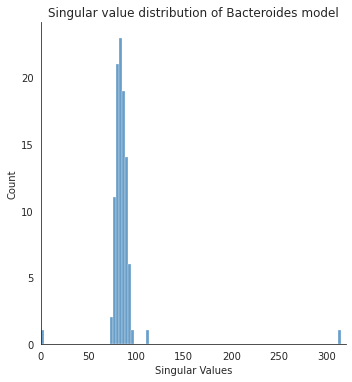

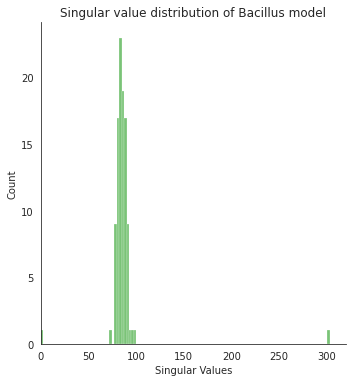

In [51]:
#plot the singular values 
sns.set_style("white")
ax1 = sns.displot(S_swissprot, color = '#e41a1c')
ax1.set(xlim = (0,320))
ax1.set(xlabel = 'Singular Values')
ax1.set(title='Singular value distribution of Swissprot model')

ax2 = sns.displot(S_bacil, color = '#377eb8')
ax2.set(xlabel = 'Singular Values')
ax2.set(xlim = (0,320))
ax2.set(title='Singular value distribution of Bacteroides model')

ax3 = sns.displot(S_bacter, color = '#4daf4a')
ax3.set(xlabel = 'Singular Values')
ax3.set(xlim = (0,320))
ax3.set(title='Singular value distribution of Bacillus model')